In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sp

In [27]:
import pandas as pd

column_names = [
    'CID', 'CIDint', 'IDSURVEY', 'TYPE', 'FIELD', 'CUTFLAG_SNANA', 'ERRFLAG_FIT',
    'zHEL', 'zHELERR', 'zCMB', 'zCMBERR', 'zHD', 'zHDERR', 'VPEC', 'VPECERR',
    'MWEBV', 'HOST_NMATCH', 'HOST_NMATCH2', 'HOST_OBJID', 'HOST_ZPHOT', 'HOST_ZPHOTERR',
    'HOST_ZSPEC', 'HOST_ZSPECERR', 'HOST_RA', 'HOST_DEC', 'HOST_ANGSEP', 'HOST_DDLR',
    'HOST_CONFUSION', 'HOST_LOGMASS', 'HOST_LOGMASS_ERR', 'HOST_LOGSFR', 'HOST_LOGSFR_ERR',
    'HOST_COLOR', 'HOST_COLOR_ERR', 'HOST_SBFLUXCAL_g', 'HOST_SBFLUXCAL_r', 'HOST_SBFLUXCAL_i',
    'HOST_SBFLUXCAL_z', 'HOST_SBMAG_g', 'HOST_SBMAG_r', 'HOST_SBMAG_i', 'HOST_SBMAG_z',
    'PKMJDINI', 'SNRMAX1', 'SNRMAX2', 'SNRMAX3', 'PKMJD', 'PKMJDERR', 'x1', 'x1ERR', 'c',
    'cERR', 'mB', 'mBERR', 'x0', 'x0ERR', 'COV_x1_c', 'COV_x1_x0', 'COV_c_x0', 'NDOF',
    'FITCHI2', 'FITPROB', 'SIM_TYPE_INDEX', 'SIM_TEMPLATE_INDEX', 'SIM_LIBID', 'SIM_NGEN_LIBID',
    'SIM_ZCMB', 'SIM_ZFLAG', 'SIM_VPEC', 'SIM_DLMAG', 'SIM_PEAKMJD', 'SIM_x1', 'SIM_c', 
    'SIM_alpha', 'SIM_beta', 'SIM_gammaDM', 'SIM_x0', 'SIM_mB', 'SIM_AV', 'SIM_RV',
    'SIM_HOSTLIB_GALID', 'SIM_HOSTLIB_r_obs_auto', 'SIM_HOSTLIB_obs_gr_auto', 
    'SIM_HOSTLIB_LOGMASS_TRUE', 'SIM_HOSTLIB_ZTRUE', 'RA', 'DEC', 'HOST_ANGSEP_2', 'TGAPMAX', 
    'TrestMIN', 'TrestMAX', 'FLUXCALMAX_g', 'SNRMAX_g', 'FLUXCALMAX_r', 'SNRMAX_r', 
    'FLUXCALMAX_i', 'SNRMAX_i', 'FLUXCALMAX_z', 'SNRMAX_z'
]

file_path = 'PIP_D5YR_BIASCOR_BIASCORSIM_DES/FITOPT000.FITRES'

def parse_sn_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    data = []
    for line in lines:
        if line.startswith("SN:"):
            # Split the line by space and remove the "SN:" prefix
            values = line[3:].strip().split()
            # Convert the values to float or int where applicable
            # values = [float(val) if '.' in val or 'e' in val else int(val) for val in values]
            data.append(values)
    
    return data


data = parse_sn_data(file_path)

df_sims = pd.DataFrame(data, columns=column_names)


In [28]:
df_sims[['c', 'SIM_c']]
df_sims = df_sims.apply(pd.to_numeric, errors='coerce')


In [29]:
df_sims

,CID,CIDint,IDSURVEY,TYPE,FIELD,CUTFLAG_SNANA,ERRFLAG_FIT,zHEL,zHELERR,zCMB,...,TrestMIN,TrestMAX,FLUXCALMAX_g,SNRMAX_g,FLUXCALMAX_r,SNRMAX_r,FLUXCALMAX_i,SNRMAX_i,FLUXCALMAX_z,SNRMAX_z
0,891719,891719,10,101,NaN,3,0,0.50637,0.00001,0.50517,...,-13.4896,17.6801,6.29580,-999.0000,33.76180,15.8609,43.56760,13.9574,45.70560,15.0658
1,1692460,1692460,10,101,NaN,3,0,0.55717,0.00001,0.55603,...,-10.1998,41.1454,20.30380,-999.0000,77.15740,9.4392,102.39950,6.7205,58.12870,5.1773
2,1186451,1186451,10,101,NaN,3,0,0.97136,0.00001,0.97058,...,-14.0627,41.7165,4.12220,-999.0000,8.47690,-999.0000,20.73350,9.7658,19.61470,6.5505
3,1868433,1868433,10,101,NaN,3,0,0.38198,0.00001,0.38089,...,-14.0650,23.5397,41.77970,-999.0000,74.21290,29.8678,70.44350,20.8457,66.33560,17.7737
4,3019084,3019084,10,101,NaN,3,0,0.50083,0.00001,0.50025,...,-10.4135,43.5800,17.18740,-999.0000,49.96050,18.8309,53.35320,21.5772,53.65830,15.7199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200169,2815840,2815840,10,101,NaN,3,0,0.57041,0.00001,0.56914,...,-11.9072,42.7609,37.84450,-999.0000,79.90350,6.9956,85.94700,5.9024,83.41140,4.9720
200170,906447,906447,10,101,NaN,3,0,0.35284,0.00001,0.35235,...,-8.2639,41.9892,132.69749,18.1313,198.42250,14.8845,180.01770,9.6673,155.98891,8.6857
200171,3108128,3108128,10,101,NaN,3,0,0.33076,0.00001,0.32967,...,-13.6347,40.4667,107.05300,15.4243,155.99651,13.3241,176.72881,12.1398,146.67171,9.5650
200172,788324,788324,10,101,NaN,3,0,0.42533,0.00001,0.42417,...,-13.0617,40.8019,81.42490,-999.0000,117.53350,11.7014,189.55161,14.9164,93.92940,9.2788


In [30]:
df_sims.columns

Index(['CID', 'CIDint', 'IDSURVEY', 'TYPE', 'FIELD', 'CUTFLAG_SNANA',
       'ERRFLAG_FIT', 'zHEL', 'zHELERR', 'zCMB', 'zCMBERR', 'zHD', 'zHDERR',
       'VPEC', 'VPECERR', 'MWEBV', 'HOST_NMATCH', 'HOST_NMATCH2', 'HOST_OBJID',
       'HOST_ZPHOT', 'HOST_ZPHOTERR', 'HOST_ZSPEC', 'HOST_ZSPECERR', 'HOST_RA',
       'HOST_DEC', 'HOST_ANGSEP', 'HOST_DDLR', 'HOST_CONFUSION',
       'HOST_LOGMASS', 'HOST_LOGMASS_ERR', 'HOST_LOGSFR', 'HOST_LOGSFR_ERR',
       'HOST_COLOR', 'HOST_COLOR_ERR', 'HOST_SBFLUXCAL_g', 'HOST_SBFLUXCAL_r',
       'HOST_SBFLUXCAL_i', 'HOST_SBFLUXCAL_z', 'HOST_SBMAG_g', 'HOST_SBMAG_r',
       'HOST_SBMAG_i', 'HOST_SBMAG_z', 'PKMJDINI', 'SNRMAX1', 'SNRMAX2',
       'SNRMAX3', 'PKMJD', 'PKMJDERR', 'x1', 'x1ERR', 'c', 'cERR', 'mB',
       'mBERR', 'x0', 'x0ERR', 'COV_x1_c', 'COV_x1_x0', 'COV_c_x0', 'NDOF',
       'FITCHI2', 'FITPROB', 'SIM_TYPE_INDEX', 'SIM_TEMPLATE_INDEX',
       'SIM_LIBID', 'SIM_NGEN_LIBID', 'SIM_ZCMB', 'SIM_ZFLAG', 'SIM_VPEC',
       'SIM_DLMAG', 'SIM_PE

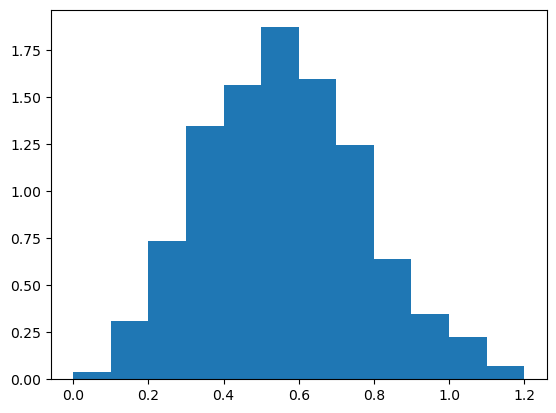

In [16]:
### for calculating model extinction from hsiao templates: 
    # histogram n(z) 

bins = np.arange(0, 1.3, 0.1)
a, b, c = plt.hist(df_sims['zCMB'], bins=bins, density=True)

In [22]:
midbins = [0.5 * (b[i] + b[i+1]) for i in range(0, len(b)-1)]
midbins = np.array(midbins)

In [27]:
np.save('nz', np.array((a, midbins)))

Text(0.5, 1.0, 'simulated c')

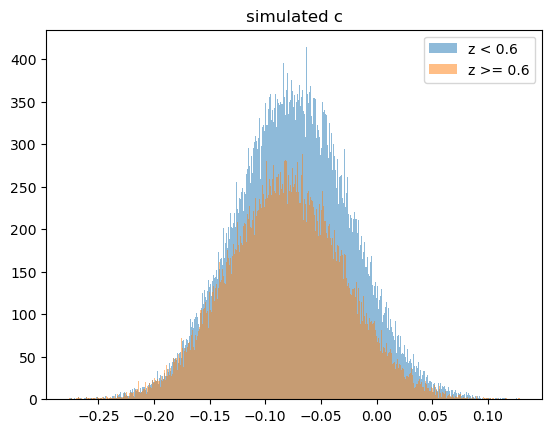

In [11]:
### change this for inputted simulated color 
csim_small_z = df_sims['SIM_c'][df_sims['zCMB'] < 0.6]
avg_csim_small_z = np.mean(csim_small_z)
csim_large_z = df_sims['SIM_c'][df_sims['zCMB'] >= 0.6]
avg_csim_large_z = np.mean(csim_large_z)

a, b, g = plt.hist(csim_small_z, bins=1000, alpha=0.5, label='z < 0.6')
a, b, g = plt.hist(csim_large_z, bins=1000, alpha=0.5, label='z >= 0.6')
plt.legend()
plt.title('simulated c')

##### So there is no intrinsic bluing in the simulations. 

Looking at the measured simulated colors, we notice: 

    * 1) c has a way wider spread than sim_c 
    * 2) c has redder mean than sim_c
    * 3) c has selection effects (high-z c's are on average measured as bluer than low-z c's) 

In [ ]:
cs_des = []
cs_des_means = []
zs_des = np.arange(0, 1.3, 0.1) 
# dropped_tnew['REDSHIFT_FINAL'].min(), dropped_tnew['REDSHIFT_FINAL'].max()

for i in range(len(zs_des) - 1): 
    cond1 = (zs_des[i] < df_sims[')
    cond2 = (dropped_tnew['REDSHIFT_FINAL'] <= zs_des[i+1])
    good_cs = dropped_colors[cond1 & cond2]
    cs_des.append(good_cs[~np.isnan(good_cs)])
    cs_des_means.append(good_cs[~np.isnan(good_cs)].mean())

In [23]:
csim_small_z.median(), csim_large_z.median(),

(-0.07516010000000001, -0.08168275)

In [20]:
avg_csim_small_z, avg_csim_large_z 

(-0.07509466653222586, -0.08147378599198406)

#### Current problem is detecting reddening from the following effects: 

* intergalactic reddening (higher c's)
* blueing from selection effects (we only observe bluer, brighter SN at high z's) 
* intrinsic blueing from host galaxy/redshift/astrophysical effects (this would be in the sim_c's, but is NOT the case)  

The blueing could also be due to selection effects.  You can check if the sims have intrinsic blueing by looking at the simulated (not measured) color values.  So we have all these competing effects and it's not trivial to separate them out from the measurements.

So there might be intergalactic reddening, but it’s hard to decouple that from the intrinsic blueing

But these plots imply that SN Ia at high-z are intrinsically bluer that whatever that's in the sims, which assume is no color evolution.

Text(0, 0.5, '# of SN')

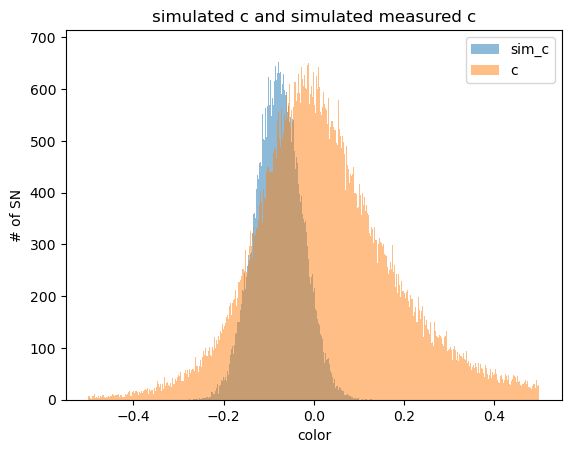

In [6]:
a, b, g = plt.hist(df_sims['SIM_c'], bins=1000, alpha=0.5, label='sim_c') 
a, b, g = plt.hist(df_sims['c'], bins=1000, alpha=0.5, label='c') 
plt.legend()
plt.title('simulated c and simulated measured c')
plt.xlabel('color') 
plt.ylabel('# of SN')

In [22]:
df_sims['c'].mean(), df_sims['SIM_c'].mean()

(0.023625868308211402, -0.07772759013751539)

Text(0.5, 1.0, 'simulated measured c for z bins')

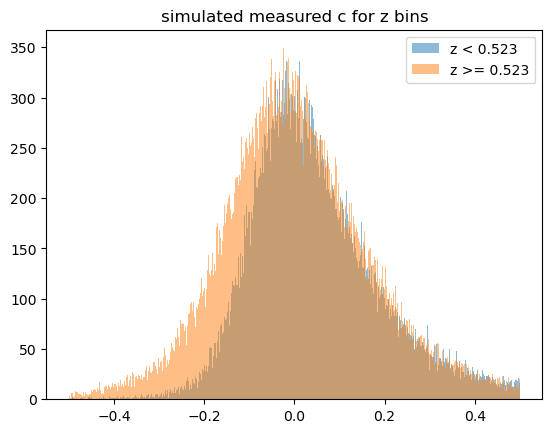

In [30]:
## again for the equal redshift divide: 
# np.load('red_div.npy')
red_div = 0.5230344533920288

c_lowz = df_sims['c'][df_sims['zCMB'] < red_div]
avg_c_lowz = np.mean(c_lowz)
c_highz = df_sims['c'][df_sims['zCMB'] >= red_div]
avg_c_highz = np.mean(c_highz)

a, b, g = plt.hist(c_lowz, bins=1000, alpha=0.5, label=f'z < {red_div:.3f}')
a, b, g = plt.hist(c_highz, bins=1000, alpha=0.5, label=f'z >= {red_div:.3f}')
plt.legend()
plt.title('simulated measured c for z bins') 

In [31]:
avg_c_lowz, avg_c_highz

(0.04636846917619818, 0.005720260865722142)

In [32]:
np.save('c_lowz', c_lowz) 
np.save('c_highz', c_highz)

Text(0.5, 1.0, 'simulated measured c for z bins')

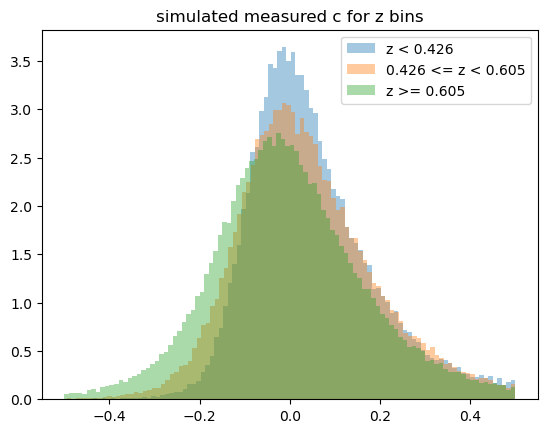

In [34]:
### more redshift bins 
red_div1, red_div2 = (0.4259740114212036, 0.6049450039863586)

c_z1 = df_sims['c'][df_sims['zCMB'] < red_div1]
avg_c_z1 = np.mean(c_z1)

c_z2 = df_sims['c'][(red_div1 <= df_sims['zCMB']) & (df_sims['zCMB'] < red_div2)]
avg_c_z2 = np.mean(c_z2)

c_z3 = df_sims['c'][df_sims['zCMB'] > red_div2]
avg_c_z3 = np.mean(c_z3)

a, b, g = plt.hist(c_z1, bins=100, alpha=0.4, density=True, label=f'z < {red_div1:.3f}')
a, b, g = plt.hist(c_z2, bins=100, alpha=0.4, density=True, label=f'{red_div1:.3f} <= z < {red_div2:.3f}')
a, b, g = plt.hist(c_z3, bins=100, alpha=0.4, density=True, label=f'z >= {red_div2:.3f}')

plt.legend()
plt.title('simulated measured c for z bins') 

In [36]:
(avg_c_z1, avg_c_z2, avg_c_z3)

np.save('c_z1', c_z1) 
np.save('c_z2', c_z2)
np.save('c_z3', c_z3)

Text(0.5, 1.0, 'simulated measured c for z bins')

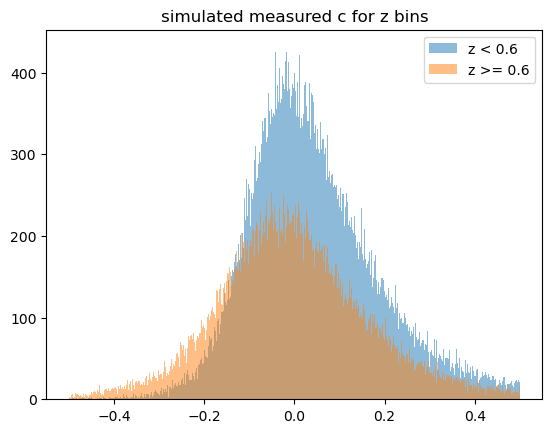

In [15]:
## original for arbitrary redshift divide 

c_small_z = df_sims['c'][df_sims['zCMB'] < 0.6]
avg_c_small_z = np.mean(c_small_z)
c_large_z = df_sims['c'][df_sims['zCMB'] >= 0.6]
avg_c_large_z = np.mean(c_large_z)

a, b, g = plt.hist(c_small_z, bins=1000, alpha=0.5, label='z < 0.6')
a, b, g = plt.hist(c_large_z, bins=1000, alpha=0.5, label='z >= 0.6')
plt.legend()
plt.title('simulated measured c for z bins') 

In [37]:
avg_c_small_z, avg_c_large_z

(0.041955568398924156, -0.002454131261670543)

In [38]:
np.save('c_small_z', c_small_z) 
np.save('c_large_z', c_large_z)

Text(0.5, 1.0, 'simulated measured c for zsim bins')

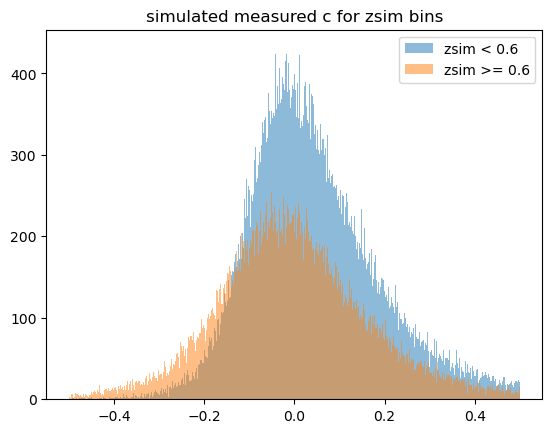

In [17]:
c_small_zsim = df_sims['c'][df_sims['SIM_ZCMB'] < 0.6]
avg_c_small_zsim = np.mean(c_small_zsim)
c_large_zsim = df_sims['c'][df_sims['SIM_ZCMB'] >= 0.6]
avg_c_large_zsim = np.mean(c_large_zsim)

a, b, g = plt.hist(c_small_zsim, bins=1000, alpha=0.5, label='zsim < 0.6')
a, b, g = plt.hist(c_large_zsim, bins=1000, alpha=0.5, label='zsim >= 0.6')
plt.legend()
plt.title('simulated measured c for zsim bins') 


Text(0.5, 1.0, 'zsim and z')

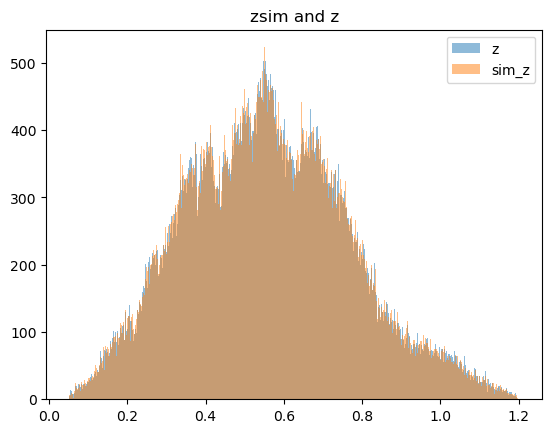

In [19]:
sim_z = pd.to_numeric(df_sims['SIM_ZCMB']).values
z = pd.to_numeric(df_sims['zCMB']).values

plt.hist(z, bins=1000, alpha=0.5, label='z')
plt.hist(sim_z, bins=1000, alpha=0.5, label='sim_z')
plt.legend()
plt.title('zsim and z') 

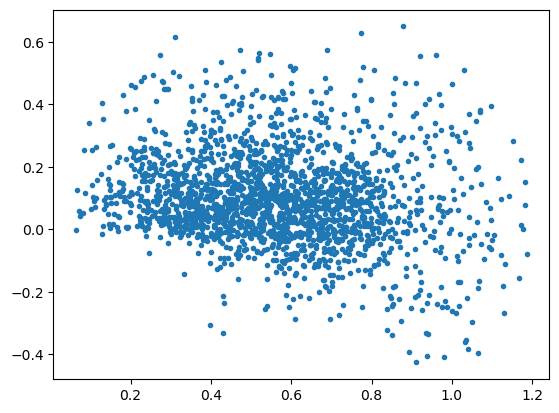

In [11]:
df_sims

plt.plot(pd.to_numeric(df_sims['SIM_ZCMB']).values[:2000], (df_sims['c'] - df_sims['SIM_c']).values[:2000], '.')

In [13]:
sim_z = pd.to_numeric(df_sims['SIM_ZCMB']).values
sim_c = pd.to_numeric(df_sims['SIM_c']).values         # bluer than cs 
cs = pd.to_numeric(df_sims['c']).values
bias_c = cs - sim_c
x1s = pd.to_numeric(df_sims['x1']).values
sim_beta = pd.to_numeric(df_sims['SIM_beta']).values
sim_alpha = pd.to_numeric(df_sims['SIM_alpha']).values
sim_mb = pd.to_numeric(df_sims['SIM_mB']).values
mbs = pd.to_numeric(df_sims['mB']).values


In [14]:
seltype = 'c'

if seltype == 'c': 
    cs = cs 
if seltype == 'sim_c': 
    cs = sim_c

## sort in c categories: 

cond_x1_neut = np.abs(x1s) < 0.40 
cond_x1_pos = x1s > 1
cond_x1_neg = x1s < -1 

cond_x1 = cond_x1_neut 

# do for various x1s: |x1| < 0.40, x1 > 1, x1 < -1 
### CASE 1 ### c < -0.1

bias_c_neg = cs[(cs<-0.1) & (cond_x1)] - sim_c[(cs<-0.1) & (cond_x1)] 
sim_z_neg = sim_z[(cs<-0.1) & (cond_x1)]


### CASE 2 ### |c| < 0.4
bias_c_0 = cs[(np.abs(cs)<0.1) & (cond_x1)] - sim_c[(np.abs(cs)<0.1) & (cond_x1)]
sim_z_0 = sim_z[(np.abs(cs)<0.1) & (cond_x1)]

### CASE 3 ### c > 0.2
bias_c_pos = cs[(cs>0.2) & (cond_x1)] - sim_c[(cs>0.2) & (cond_x1)]
sim_z_pos = sim_z[(cs>0.2) & (cond_x1)]


#### x1 cases



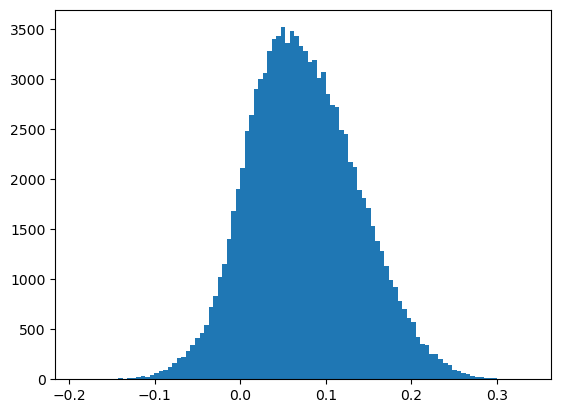

In [40]:
a, b, d = plt.hist(bias_c_0, bins=100, density=True)

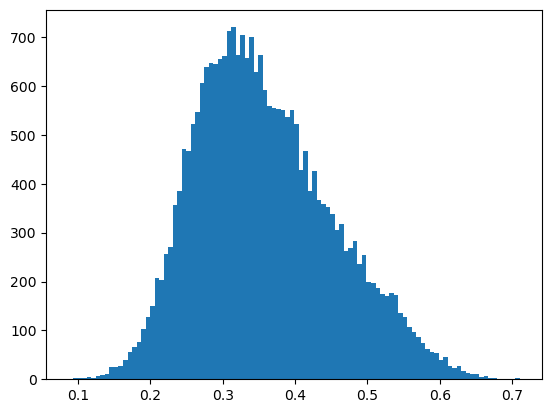

In [41]:
a, b, d = plt.hist(bias_c_pos, bins=100)

Text(0, 0.5, 'number')

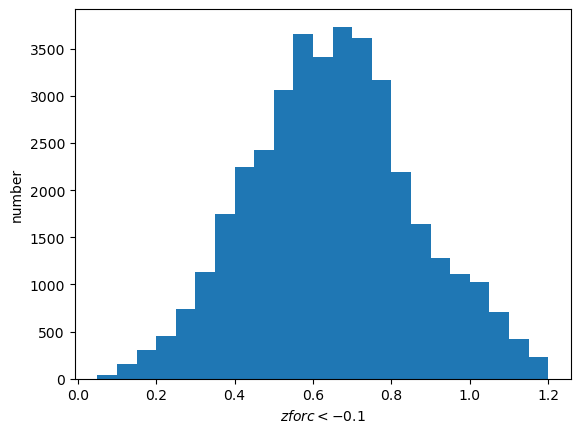

In [42]:
bins = np.arange(0.05, 1.25, 0.05)
n, b, c = plt.hist(sim_z_neg, bins=bins)
plt.xlabel('$z for c<-0.1$') 
plt.ylabel('number')

In [16]:
## sort in c categories: 

cond_x1_neut = np.abs(x1s) < 0.40 
cond_x1_pos = x1s > 1
cond_x1_neg = x1s < -1 

# cond_x1 = cond_x1_neut 
# cond_x1 = cond_x1_pos 
# cond_x1 = cond_x1_neg


# do for various x1s: |x1| < 0.40, x1 > 1, x1 < -1 
### CASE 1 ### c < -0.1

bias_c_neg = cs[(cs<-0.1) & (cond_x1)] - sim_c[(cs<-0.1) & (cond_x1)] 
sim_z_neg = sim_z[(cs<-0.1) & (cond_x1)]

### CASE 2 ### |c| < 0.4
bias_c_0 = cs[(np.abs(cs)<0.1) & (cond_x1)] - sim_c[(np.abs(cs)<0.1) & (cond_x1)]
sim_z_0 = sim_z[(np.abs(cs)<0.1) & (cond_x1)]

### CASE 3 ### c > 0.2
bias_c_pos = cs[(cs>0.2) & (cond_x1)] - sim_c[(cs>0.2) & (cond_x1)]
sim_z_pos = sim_z[(cs>0.2) & (cond_x1)]


#### x1 cases


In [17]:
sim_z = pd.to_numeric(df_sims['SIM_ZCMB']).values
sim_c = pd.to_numeric(df_sims['SIM_c']).values         # bluer than cs 
cs = pd.to_numeric(df_sims['c']).values
bias_c = cs - sim_c
x1s = pd.to_numeric(df_sims['x1']).values
sim_x1 = pd.to_numeric(df_sims['SIM_x1']).values
sim_beta = pd.to_numeric(df_sims['SIM_beta']).values
sim_alpha = pd.to_numeric(df_sims['SIM_alpha']).values
sim_mb = pd.to_numeric(df_sims['SIM_mB']).values
mbs = pd.to_numeric(df_sims['mB']).values

cond_x1_neut = np.abs(x1s) < 0.40 
cond_x1_pos = x1s > 1
cond_x1_neg = x1s < -1 
#cond_x1 = 


cond_c_neut = np.abs(cs) < 0.1
# cond_c_pos = cs > 0.2
cond_c_pos = cs > 0.1
cond_c_neg = cs < -0.1 
# cond_c = 

### Bias corrections for c 
* NOTE: c is intrinsic b/c applied color smearing, so can't use for bias corrections vs. redshift
    * That's why it doesn't start at 0 for redshift 0

In [ ]:
## note i changed this to generate for c>0.1 is the positive color selection

In [31]:
sim_c =  df_sims['SIM_c'] + 0.5*df_sims['SIM_AV']

def calc_cbias(ctype, cond_x1, seltype, bet=True):
    """
    ctype: 'neg', 'neut', 'pos'
    cond_x1: cond_x1_neg, cond_x1_neut, cond_x1_pos
    seltype: 'c', 'sim_c'          # do on either cs or csims
    """

    if seltype == 'c': 
        c = cs
    if seltype == 'sim_c': 
        c = sim_c

    if ctype == 'neg': 
        sim_z_neg = sim_z[(c<-0.1) & (cond_x1)]
        sz = sim_z_neg
        
        bias_c_neg = c[(c<-0.1) & (cond_x1)] - sim_c[(c<-0.1) & (cond_x1)] 
        bias_c = bias_c_neg
        
        beta = sim_beta[(c<-0.1) & (cond_x1)]
        
    if ctype == 'neut': 
        sim_z_0 = sim_z[(np.abs(c)<0.1) & (cond_x1)]
        sz = sim_z_0

        bias_c_0 = c[(np.abs(c)<0.1) & (cond_x1)] - sim_c[(np.abs(c)<0.1) & (cond_x1)]
        bias_c = bias_c_0
        
        beta = sim_beta[(np.abs(c)<0.1) & (cond_x1)]

    if ctype == 'pos': 
        sim_z_pos = sim_z[(c>0.1) & (cond_x1)]
        sz = sim_z_pos
        
        bias_c_pos = c[(c>0.1) & (cond_x1)] - sim_c[(c>0.1) & (cond_x1)]
        bias_c = bias_c_pos 
        
        beta = sim_beta[(c>0.1) & (cond_x1)]


        
    ## redshift bins 
    bins = np.arange(0.05, 1.25, 0.05)
    n, b = np.histogram(sz, bins=bins)

    # n, b, c = plt.hist(sim_z_neg, bins=bins)
    # plt.xlabel(f'$z$ for c={type}') 
    # plt.ylabel('number')

    zbins = [[] for _ in range(len(b) - 1)]
    for i in range(len(b)-1): 
        zbin = sz[(b[i] <= sz) & (sz <= b[i+1])]
        zbins[i] = zbin
        
    
    # with beta
    if bet == True: 
        be = beta
    else: 
        be = 1

    dcbins = [[] for _ in range(len(b) - 1)]
    for i in range(len(b)-1): 
        dcbin = (be*bias_c)[(b[i] <= sz) & (sz <= b[i+1])]
        dcbins[i] = dcbin

    dcmeans = [dcbins[i].mean() for i in range(len(dcbins))]                        # mask the nans 
    zmeans = [zbins[i].mean() for i in range(len(zbins))]     # also mask the nans 

    # dc_stds = [np.std(cbins[i][~np.isnan(cbins[i])]) for i in range(len(cbins))]
    # host_stds = [np.std(host_bins[i][~np.isnan(cbins[i])]) for i in range(len(host_bins))]

    dc_rms = [np.sqrt(np.sum((dcbins[i] - dcmeans[i])**2) / len(dcbins[i])) for i in range(len(dcbins))]
    z_rms = [np.sqrt(np.sum((zbins[i] - zmeans[i])**2) / len(zbins[i])) for i in range(len(zbins))]

    dc_errmean = [dc_rms[i] / np.sqrt(len(dcbins[i])) for i in range(len(dcbins))]

    return zmeans, dcmeans, dc_errmean

    # plt.figure(figsize=(8,8))
    # plt.errorbar(zmeans, dcmeans, dc_errmean, fmt='o')
    # # plt.ylim(1e19, 1e30)
    # # plt.yscale('log')
    # # plt.xscale('log')
    # plt.grid()
    # plt.title(f'binned bias in c={type} vs. z')
    # plt.xlabel(f'$z$ for c={type}')
    # plt.ylabel('$\delta c$')

In [32]:
# ctypes = {'neg': ['bo', 'c < -0.1'],
#      'neut': ['ko', '|c| < 0.1'], 
#      'pos': ['ro', 'c > 0.2']}

ctypes = {'neg': ['bo', 'c < -0.1'],
     'neut': ['ko', '|c| < 0.1'], 
     'pos': ['ro', 'c > 0.1']}

x1types = {'neg': [cond_x1_neg, '|x1| < -1'], 
           'neut': [cond_x1_neut, '|x1| < 0.40'], 
           'pos': [cond_x1_pos, '|x1| > 1']}

In [305]:
# l = len(x1s[np.argsort(x1s)])
# g1 = x1s[np.argsort(x1s)][:int(np.floor(l/3))]
# g2 = x1s[np.argsort(x1s)][int(np.floor(l/3)):int(np.floor(2*l/3))]
# g3 = x1s[np.argsort(x1s)][int(np.floor(2*l/3)):]


In [354]:
np.save('zmeans', res[3]) 
np.save('zbins', np.arange(0.05, 1.25, 0.05))

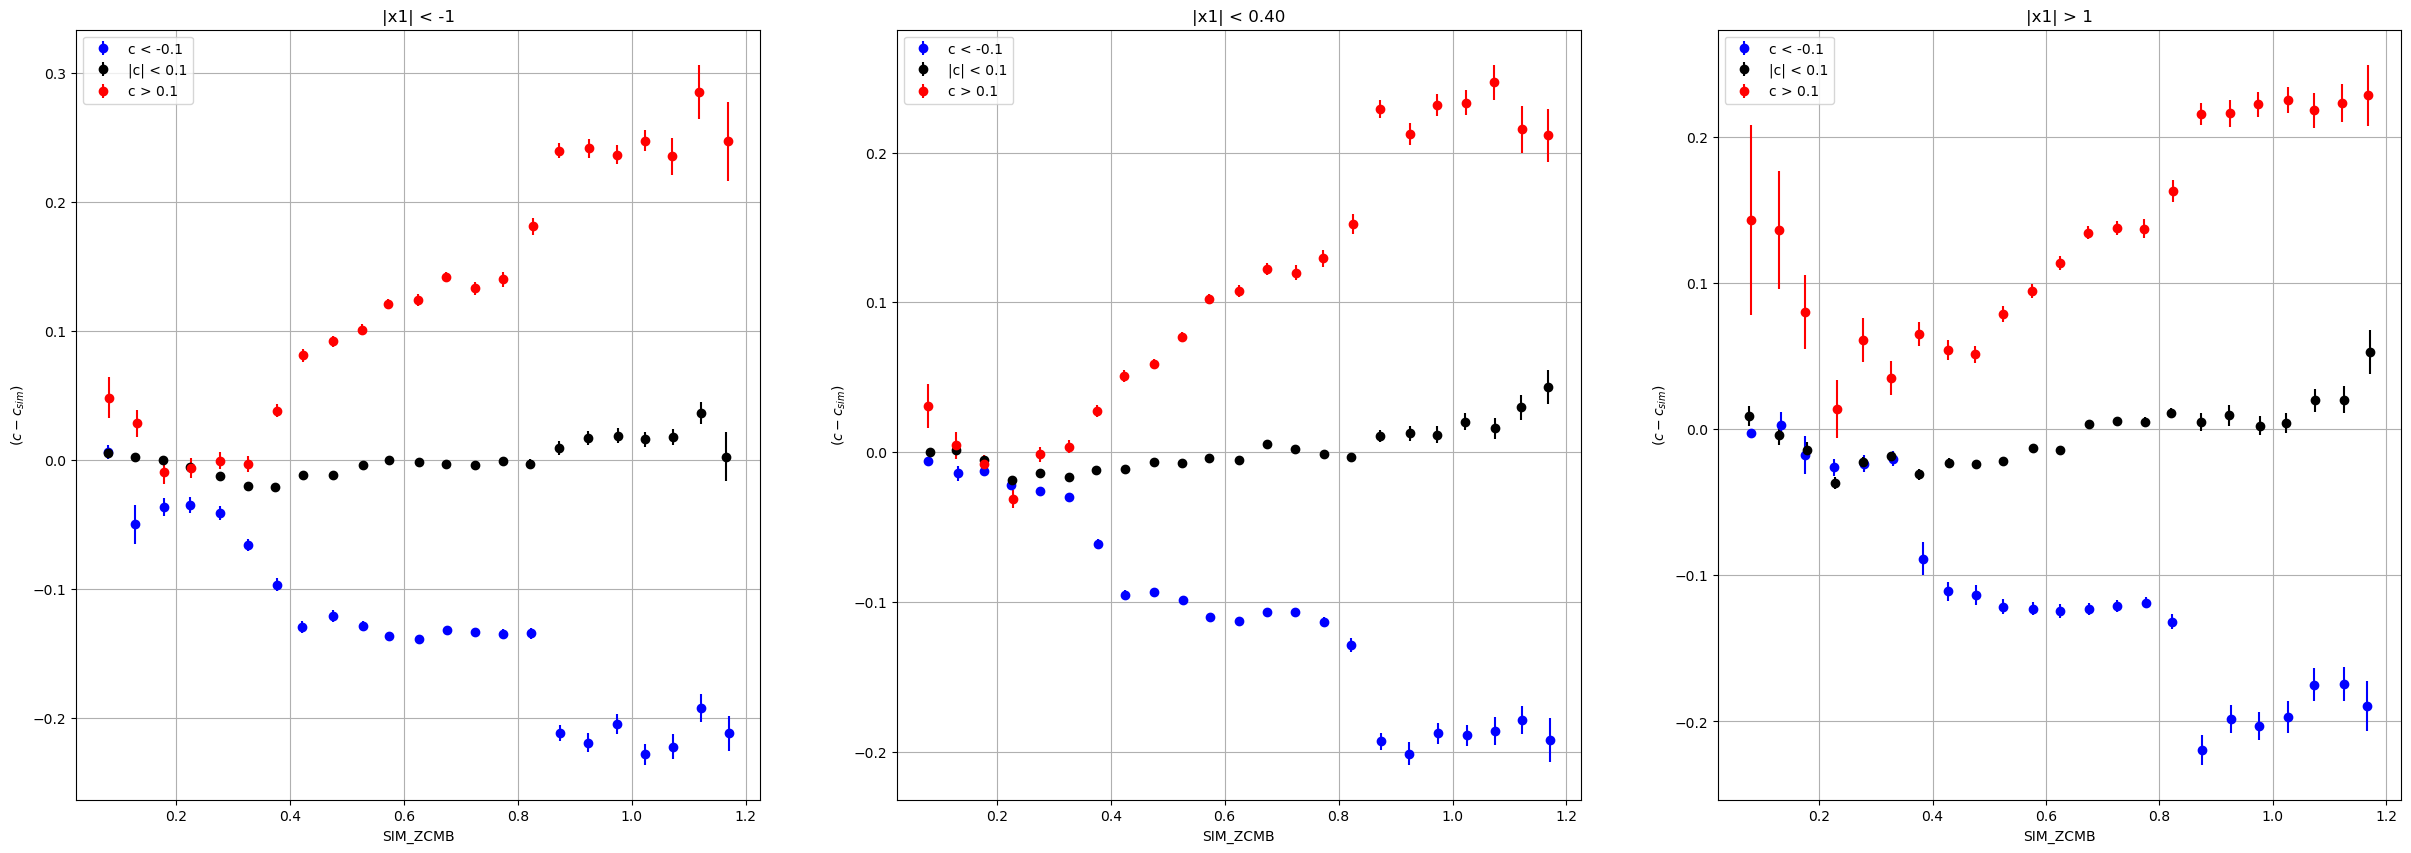

In [34]:
fig, axs = plt.subplots(1, 3, figsize=(30, 10))
    
for i, x1type in enumerate(x1types): 
    for ctype in ctypes:
        res = calc_cbias(f'{ctype}', x1types[x1type][0], seltype='c', bet=False)
        np.savez(f'{ctypes[ctype][1]}_{x1types[x1type][1]}', zmeans=res[0], dcmeans=res[1], dc_errmean=res[2])
        axs[i].errorbar(res[0], res[1], res[2], fmt=f'{ctypes[ctype][0]}', label=f'{ctypes[ctype][1]}')
        axs[i].legend()
        axs[i].set_title(x1types[x1type][1])
        # axs[i].set_ylabel(r'$\beta (c - c_{sim})$')
        axs[i].set_ylabel(r'$(c - c_{sim})$')
        axs[i].set_xlabel('SIM_ZCMB')
        axs[i].grid()
    


### Bias corrections for x1

In [197]:
def calc_x1bias(x1type, cond_c, alph=True):
    
    if x1type == 'pos': 

        sim_z_pos = sim_z[(1<x1s) & (x1s<2) & (cond_c)]
        sz = sim_z_pos

        bias_x1_pos = x1s[(1<x1s) & (x1s<2) & (cond_c)] - sim_x1[(1<x1s) & (x1s<2) & (cond_c)]
        bias_x1 = bias_x1_pos

        alpha = sim_alpha[(1<x1s) & (x1s<2) & (cond_c)]


    if x1type == 'neg': 

        sim_z_neg = sim_z[(-3<x1s) & (x1s<-2) & (cond_c)]
        sz = sim_z_neg

        bias_x1_neg = x1s[(-3<x1s) & (x1s<-2) & (cond_c)] - sim_x1[(-3<x1s) & (x1s<-2) & (cond_c)]
        bias_x1 = bias_x1_neg

        alpha = sim_alpha[(-3<x1s) & (x1s<-2) & (cond_c)]


    ## redshift bins 
    bins = np.arange(0.05, 1.25, 0.05)
    n, b = np.histogram(sz, bins=bins)

    # n, b, c = plt.hist(sim_z_neg, bins=bins)
    # plt.xlabel(f'$z$ for c={type}') 
    # plt.ylabel('number')

    zbins = [[] for _ in range(len(b) - 1)]
    for i in range(len(b)-1): 
        zbin = sz[(b[i] <= sz) & (sz <= b[i+1])]
        zbins[i] = zbin


    # with beta
    if alph == True: 
        al = alpha
    else: 
        al = 1

    dxbins = [[] for _ in range(len(b) - 1)]
    for i in range(len(b)-1): 
        dxbin = (al*bias_x1)[(b[i] <= sz) & (sz <= b[i+1])]
        dxbins[i] = dxbin

    dxmeans = [dxbins[i].mean() for i in range(len(dxbins))]                        # mask the nans 
    zmeans = [zbins[i].mean() for i in range(len(zbins))]     # also mask the nans 

    dx_rms = [np.sqrt(np.sum((dxbins[i] - dxmeans[i])**2) / len(dxbins[i])) for i in range(len(dxbins))]
    z_rms = [np.sqrt(np.sum((zbins[i] - zmeans[i])**2) / len(zbins[i])) for i in range(len(zbins))]

    dx_errmean = [dx_rms[i] / np.sqrt(len(dxbins[i])) for i in range(len(dxbins))]

    return zmeans, dxmeans, dx_errmean

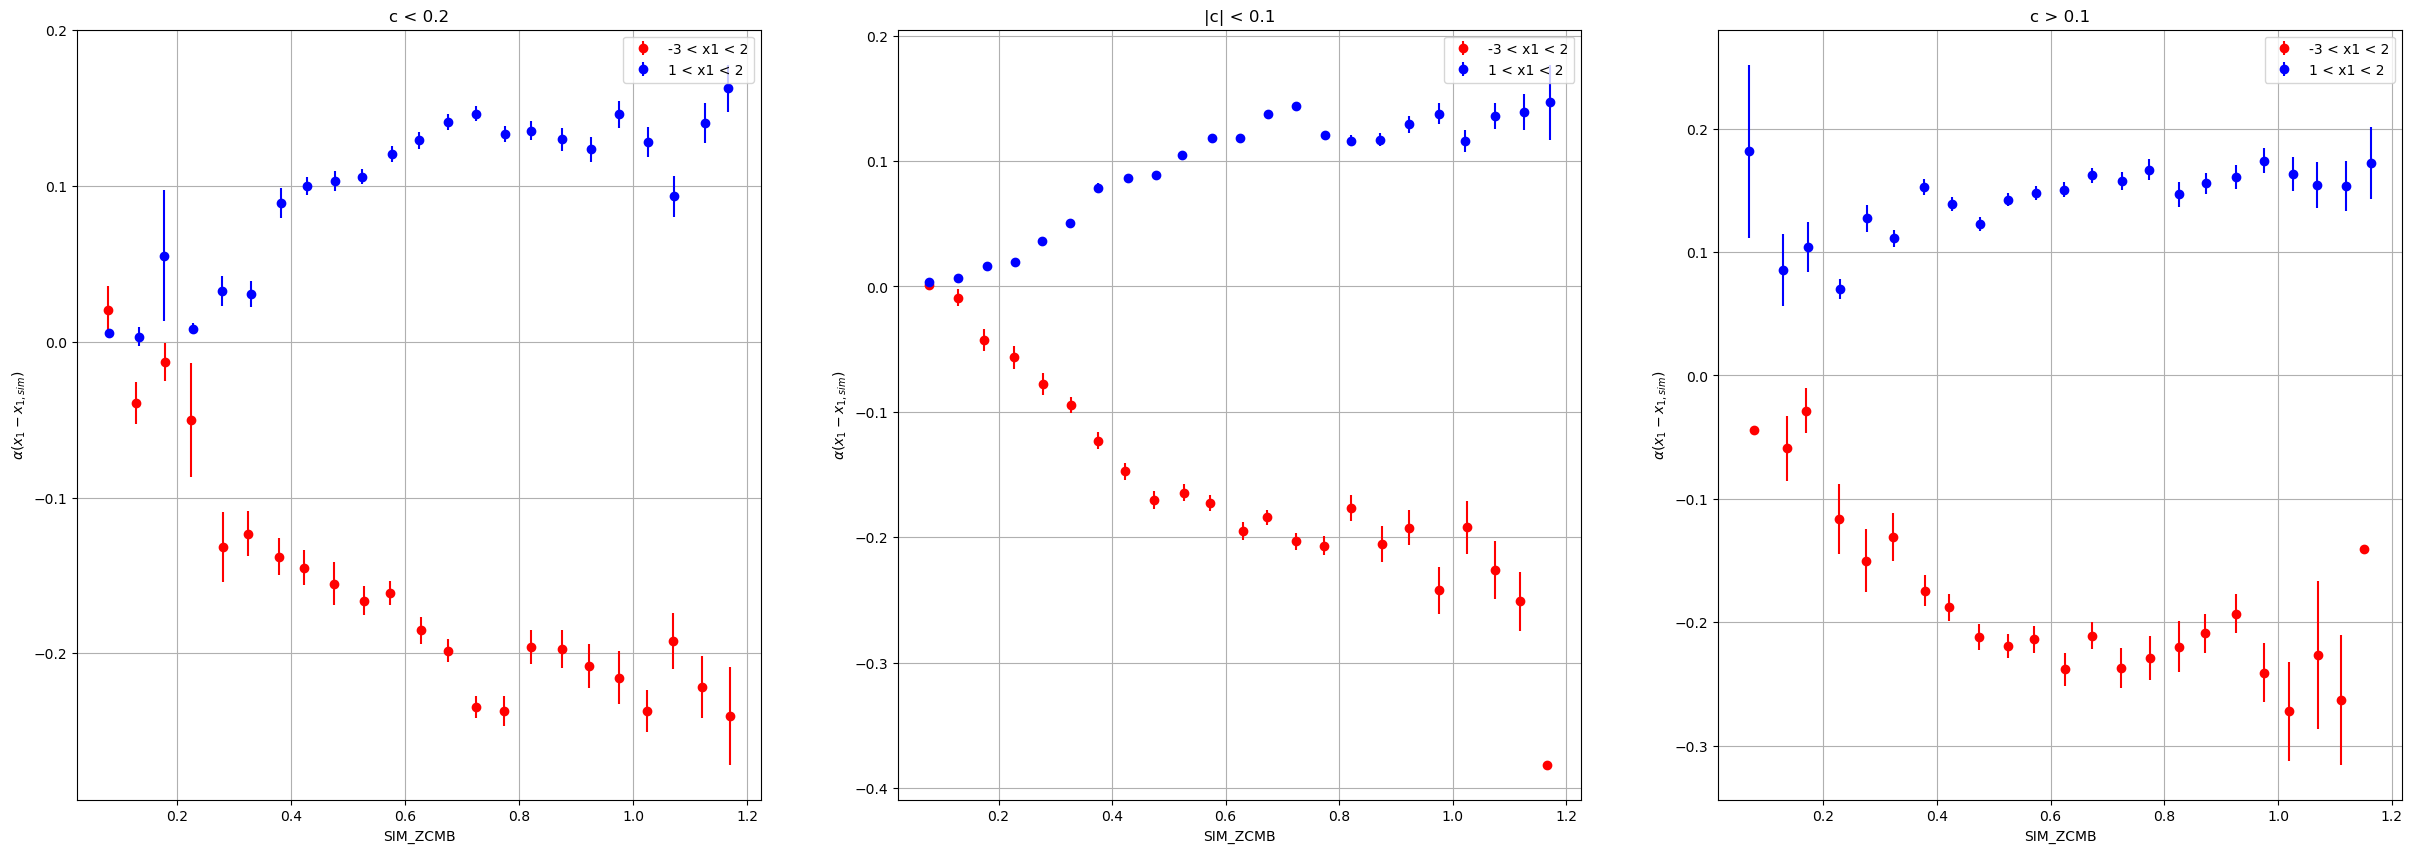

In [250]:
fig, axs = plt.subplots(1, 3, figsize=(30, 10))
    
cconds = [cond_c_neg, cond_c_neut, cond_c_pos]

for i, ctype in enumerate(ctypes):

    for x1type in ['neg', 'pos']: 
        res = calc_x1bias(x1type, cconds[i], alph=True)
        if x1type == 'neg': 
            fmt = 'ro'
            label = '-3 < x1 < 2'
        else: 
            fmt = 'bo'
            label = '1 < x1 < 2'

        axs[i].errorbar(res[0], res[1], res[2], fmt=fmt, label=label)
        axs[i].legend()
        axs[i].grid(True)
        axs[i].set_xlabel('SIM_ZCMB')
        axs[i].set_ylabel(r'$\alpha (x_1 - x_{1,sim})$')
        axs[i].set_title(ctypes[ctype][1])
    

### Bias corrections for m_B

In [269]:
cond_c = np.abs(c)<0.05
cond_x1 = np.abs(x1s)<0.4

def calc_mbbias():
    bias_mb = (mbs - sim_mb)[cond_c & cond_x1]

    sim_z_mb = sim_z[cond_c & cond_x1]
    sz = sim_z_mb

    bins = np.arange(0.05, 1.25, 0.05)
    n, b = np.histogram(sz, bins=bins)

    zbins = [[] for _ in range(len(b) - 1)]
    for i in range(len(b)-1): 
        zbin = sz[(b[i] <= sz) & (sz <= b[i+1])]
        zbins[i] = zbin


    dmbins = [[] for _ in range(len(b) - 1)]
    for i in range(len(b)-1): 
        dmbin = (bias_mb)[(b[i] <= sz) & (sz <= b[i+1])]
        dmbins[i] = dmbin

    dmmeans = [dmbins[i].mean() for i in range(len(dmbins))]                        # mask the nans 
    zmeans = [zbins[i].mean() for i in range(len(zbins))]     # also mask the nans 

    dm_rms = [np.sqrt(np.sum((dmbins[i] - dmmeans[i])**2) / len(dmbins[i])) for i in range(len(dmbins))]
    z_rms = [np.sqrt(np.sum((zbins[i] - zmeans[i])**2) / len(zbins[i])) for i in range(len(zbins))]

    dm_errmean = [dm_rms[i] / np.sqrt(len(dmbins[i])) for i in range(len(dmbins))]

    return zmeans, dmmeans, dm_errmean

Text(0.5, 1.0, '|c| < 0.05 and |x1| < 0.4')

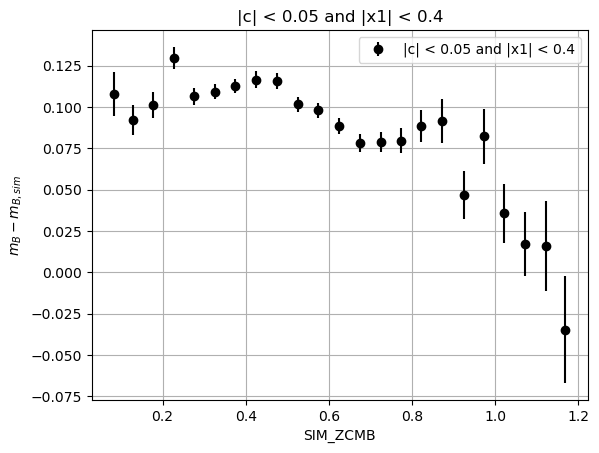

In [270]:
# fig, axs = plt.subplots(1, 1, figsize=(8, 8))

res = calc_mbbias()

fmt = 'ko'
label = '|c| < 0.05 and |x1| < 0.4'
plt.errorbar(res[0], res[1], res[2], fmt=fmt, label=label)
plt.legend()
plt.grid(True)
plt.xlabel('SIM_ZCMB')
plt.ylabel(r'$m_B - m_{B,sim}$')
plt.title('|c| < 0.05 and |x1| < 0.4')


# axs[i].errorbar(res[0], res[1], res[2], fmt=fmt, label=label)
# axs[i].legend()
# axs[i].grid(True)
# axs[i].set_xlabel('SIM_ZCMB')
# axs[i].set_ylabel(r'$\alpha (x_1 - x_{1,sim})$')
# axs[i].set_title(ctypes[ctype][1])

### Bias in $\mu$

In [277]:
## same for mu - mu_true: 

# mu = B + alpha*x1 - beta*c - M0
# mu_true = mB_sim + alpha(x1_sim) - beta(c_sim) - M0 

### mu - mu_true = mB - mB_sim + alpha(x1 - x1_sim) - beta(c - c_sim) 
###              = (delta mB) + alpha (delta x1) - beta(delta c)

## no conditions on c or x1 
bias_mb = mbs - sim_mb
bias_x1 = x1s - sim_x1
bias_c = cs - sim_c

bias_mu = bias_mb + sim_alpha*bias_x1 - sim_beta*bias_c

In [281]:
def calc_bias_mu():        # binned
    bias_mu = bias_mb + sim_alpha*bias_x1 - sim_beta*bias_c
    sz = sim_z


    bins = np.arange(0.05, 1.25, 0.05)
    n, b = np.histogram(sz, bins=bins)

    zbins = [[] for _ in range(len(b) - 1)]
    for i in range(len(b)-1): 
        zbin = sz[(b[i] <= sz) & (sz <= b[i+1])]
        zbins[i] = zbin


    dvbins = [[] for _ in range(len(b) - 1)]
    for i in range(len(b)-1): 
        dvbin = (bias_mu)[(b[i] <= sz) & (sz <= b[i+1])]
        dvbins[i] = dvbin

    dvmeans = [dvbins[i].mean() for i in range(len(dvbins))]                        # mask the nans 
    zmeans = [zbins[i].mean() for i in range(len(zbins))]     # also mask the nans 

    dv_rms = [np.sqrt(np.sum((dvbins[i] - dvmeans[i])**2) / len(dvbins[i])) for i in range(len(dvbins))]
    z_rms = [np.sqrt(np.sum((zbins[i] - zmeans[i])**2) / len(zbins[i])) for i in range(len(zbins))]

    dv_errmean = [dv_rms[i] / np.sqrt(len(dvbins[i])) for i in range(len(dvbins))]

    return zmeans, dvmeans, dv_errmean

Text(0, 0.5, '$\\mu - \\mu_{sim}$')

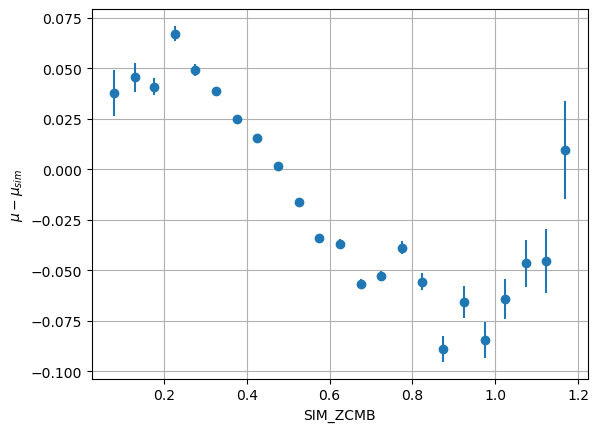

In [318]:
plt.errorbar(calc_bias_mu()[0], calc_bias_mu()[1], calc_bias_mu()[2], fmt='o')
plt.grid()
plt.xlabel('SIM_ZCMB')
plt.ylabel(r'$\mu - \mu_{sim}$')

In [334]:
df_sims[['SIM_AV', 'SIM_RV']]

,SIM_AV,SIM_RV
0,0.966780,1.88225
1,0.201660,1.05277
2,0.156020,1.08209
3,0.739580,3.57687
4,0.750410,3.61543
...,...,...
200169,0.049332,1.48341
200170,0.035876,1.34662
200171,0.061461,0.97397
200172,0.376450,3.08972


In [331]:
df_sims.columns

Index(['CID', 'CIDint', 'IDSURVEY', 'TYPE', 'FIELD', 'CUTFLAG_SNANA',
       'ERRFLAG_FIT', 'zHEL', 'zHELERR', 'zCMB', 'zCMBERR', 'zHD', 'zHDERR',
       'VPEC', 'VPECERR', 'MWEBV', 'HOST_NMATCH', 'HOST_NMATCH2', 'HOST_OBJID',
       'HOST_ZPHOT', 'HOST_ZPHOTERR', 'HOST_ZSPEC', 'HOST_ZSPECERR', 'HOST_RA',
       'HOST_DEC', 'HOST_ANGSEP', 'HOST_DDLR', 'HOST_CONFUSION',
       'HOST_LOGMASS', 'HOST_LOGMASS_ERR', 'HOST_LOGSFR', 'HOST_LOGSFR_ERR',
       'HOST_COLOR', 'HOST_COLOR_ERR', 'HOST_SBFLUXCAL_g', 'HOST_SBFLUXCAL_r',
       'HOST_SBFLUXCAL_i', 'HOST_SBFLUXCAL_z', 'HOST_SBMAG_g', 'HOST_SBMAG_r',
       'HOST_SBMAG_i', 'HOST_SBMAG_z', 'PKMJDINI', 'SNRMAX1', 'SNRMAX2',
       'SNRMAX3', 'PKMJD', 'PKMJDERR', 'x1', 'x1ERR', 'c', 'cERR', 'mB',
       'mBERR', 'x0', 'x0ERR', 'COV_x1_c', 'COV_x1_x0', 'COV_c_x0', 'NDOF',
       'FITCHI2', 'FITPROB', 'SIM_TYPE_INDEX', 'SIM_TEMPLATE_INDEX',
       'SIM_LIBID', 'SIM_NGEN_LIBID', 'SIM_ZCMB', 'SIM_ZFLAG', 'SIM_VPEC',
       'SIM_DLMAG', 'SIM_PE

In [333]:
for col in np.array(df_sims.columns): 
    if 'm' in col: 
        print(col)

mB
mBERR
SIM_gammaDM
SIM_mB


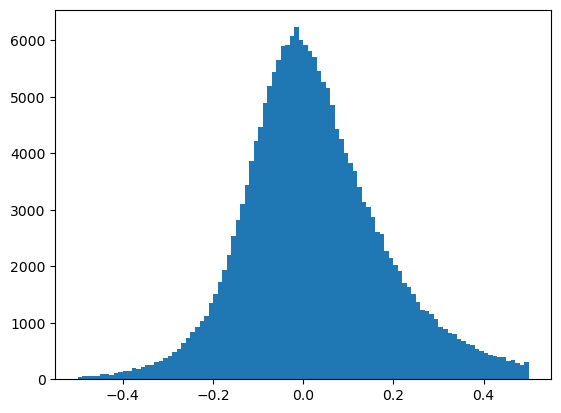

In [17]:
a, b, c = plt.hist(df_sims['c'], bins=100)

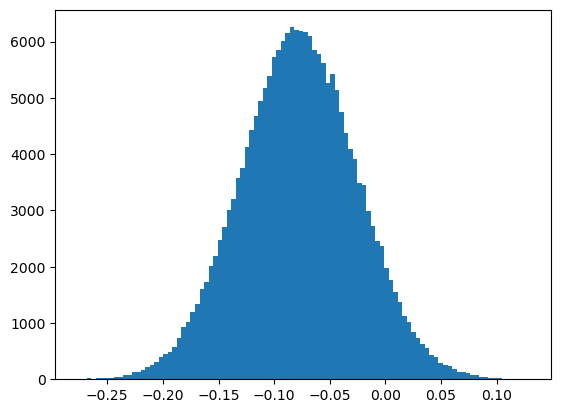

In [15]:
a, b, c = plt.hist(sim_c, bins=100)

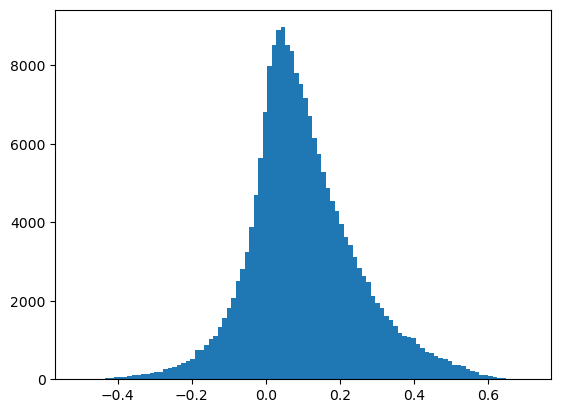

In [19]:
a, b, c = plt.hist(df_sims['c'] - sim_c, bins=100)

In [ ]:
* (1) higher star formation rate = higher dust content
    * dust in different types of galaxies -> read paper
    * weight by this
    * ^ make the n_H weighting more realistic with galaxy TYPE -> 10^24 is completely opaque 
        * star formation rate
        * mass doesn’t really correlate (but generally, elliptical are more massive b/c older and have accreted more mass) 


In [ ]:
* (2) also, you need to correct for the selection bias that we observe more intrinsicially blue (brighter) sn at higher redshifts
    * since we can’t observe the redder ones as they’re fainter
    * malmquist bias -> around z = 0.6
        * most analyses use: asymmetric gaussian for color vs. redshift
    * correct for this bias by maybe multiplying by a weight? look at simulations, paper (pretty technical, ACTUALLY NOT RELEVANT AT ALL) 
    * —> see how the color distribution evolves with redshift, specifically for DES
        * simulation exists, helen? or rick? 
    * this would in theory make sn with higher n_h redder (the effect more pronounced) 
    * bias cor yml: 10x size of des survey
        * use the median for this and correct? 
        * correct for this -> deviation from 0, just add at higher redshifts for now. 
        * => should be on midway actually. 

In [ ]:
* ultimately want to look at how much (luminosity) distance changes because of this reddening at every redshift
    * plot redshift vs. intergalactic dust extinction (how much color shift at every redshift?) 
* (3) another thing - do this indendently! 
    * how much is the n_h contribution coming from, is it the handful of nearby ones or the collection of distant ones?
        * look at this
    * —> do this independently: 
        * look at sn at high redshift, but lower extinction & lower redshift but higher extinction, and see what the ratio is
        * different absorbers along line of sight 